In [967]:
## Import statements
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score
from decorator import append
from sklearn import datasets
from sympy.abc import theta
import pandas as pd
import statsmodels.api as sm




## Data Set
The data set we used is the same across all of our models. 

In [ ]:
filepath_train_2021 = 'Data_2021.txt'
filepath_train_2022 = 'Data_2022.txt'
filepath_train_2023 = 'Data_2023.txt'
filepath_test_2024 = 'Data_2024.txt'
Window_size = 12

# Define column names once
colnames = ["YY","MM","DD","hh","mm","WDIR","WSPD","GST","WVHT","DPD","APD","MWD",
            "PRES","ATMP","WTMP","DEWP","VIS","TIDE"]

# Load all training years
data_2021 = pd.read_csv(filepath_train_2021, sep=r'\s+', comment='#', header=None)
data_2022 = pd.read_csv(filepath_train_2022, sep=r'\s+', comment='#', header=None)
data_2023 = pd.read_csv(filepath_train_2023, sep=r'\s+', comment='#', header=None)

for df in [data_2021, data_2022, data_2023]:
    df.columns = colnames
    # Replace missing values
    df.replace({99.00: np.nan, 99.0: np.nan, 999: np.nan, 999.0: np.nan}, inplace=True)
    # Drop rows without wave height
    df.dropna(subset=["WVHT"], inplace=True)
    # Interpolate
    df.interpolate(inplace=True)
    df.bfill(inplace=True)
    df.ffill(inplace=True)
    # Datetime
    df["datetime"] = pd.to_datetime(
        df[['YY','MM','DD','hh','mm']].rename(
            columns={'YY':'year','MM':'month','DD':'day','hh':'hour','mm':'minute'}
        )
    )
    df.drop(columns=["YY","MM","DD","hh","mm","VIS","TIDE"], inplace=True)
    # Cyclical features
    df["hour_sin"] = np.sin(2*np.pi*df["datetime"].dt.hour / 24)
    df["hour_cos"] = np.cos(2*np.pi*df["datetime"].dt.hour / 24)
    df["doy_sin"]  = np.sin(2*np.pi*df["datetime"].dt.dayofyear / 365)
    df["doy_cos"]  = np.cos(2*np.pi*df["datetime"].dt.dayofyear / 365)
    df.drop(columns=["datetime"], inplace=True)

data_train = pd.concat([data_2021, data_2022, data_2023], ignore_index=True)
data_test = pd.read_csv(filepath_test_2024, sep=r'\s+', comment='#', header=None)
data_test.columns = colnames

# Replace missing values with NaNs
data_train= data_train.replace({99.00: np.nan, 99.0: np.nan, 999: np.nan, 999.0: np.nan})
data_test= data_test.replace({99.00: np.nan, 99.0: np.nan, 999: np.nan, 999.0: np.nan})
# Drop rows without wave height
data_train= data_train.dropna(subset=["WVHT"])
data_test= data_test.dropna(subset=["WVHT"])
# Interpolate to fill in any remaining NaNs
data_train= data_train.interpolate().bfill().ffill()
data_test= data_test.interpolate().bfill().ffill()

data_test["datetime"]= pd.to_datetime(data_test[['YY','MM','DD','hh','mm']].rename(columns=
        {'YY':'year','MM':'month','DD':'day','hh':'hour','mm':'minute'}))
data_test= data_test.drop(columns=["YY","MM","DD","hh","mm","VIS","TIDE"])

data_test["hour_sin"] = np.sin(2*np.pi*data_test["datetime"].dt.hour / 24)
data_test["hour_cos"] = np.cos(2*np.pi*data_test["datetime"].dt.hour / 24)
data_test["doy_sin"]  = np.sin(2*np.pi*data_test["datetime"].dt.dayofyear / 365)
data_test["doy_cos"]  = np.cos(2*np.pi*data_test["datetime"].dt.dayofyear / 365)
data_test= data_test.drop(columns=["datetime"])


#Data_of_interest = ['WDIR', 'WSPD', 'GST','DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'hour_sin', 'hour_cos', 'doy_sin', 'doy_cos']
Data_of_interest = ['WDIR', 'WSPD', 'GST', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'hour_sin', 'hour_cos', 'doy_sin', 'doy_cos']

win = 1
X_train = data_train[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X_train = X_train[win-1:] 
X_test = data_test[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X_test = X_test[win-1:]



Y_train = data_train['WVHT'].copy().to_numpy()
Y_train = Y_train[win-1:]
Y_test = data_test['WVHT'].copy().to_numpy()
Y_test = Y_test[win-1:]


print(X_train.shape)

(24126, 11)


In [969]:
## Model 1
win = 1
X1TRN = data_train[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X1TRN = X1TRN[win-1:] 
X1TST = data_test[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X1TST = X1TST[win-1:]
Y1TRN = data_train['WVHT'].copy().to_numpy()
Y1TRN = Y1TRN[win-1:]
Y1TST = data_test['WVHT'].copy().to_numpy()
Y1TST = Y1TST[win-1:]


In [970]:
## Model 2
win = 6
X2TRN = data_train[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X2TRN = X2TRN[win-1:] 
X2TST = data_test[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X2TST = X2TST[win-1:]
Y2TRN = data_train['WVHT'].copy().to_numpy()
Y2TRN = Y2TRN[win-1:]
Y2TST = data_test['WVHT'].copy().to_numpy()
Y2TST = Y2TST[win-1:]

In [971]:
##Model3
win = 12
X3TRN = data_train[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X3TRN = X3TRN[win-1:] 
X3TST = data_test[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X3TST = X3TST[win-1:]
Y3TRN = data_train['WVHT'].copy().to_numpy()
Y3TRN = Y3TRN[win-1:]
Y3TST = data_test['WVHT'].copy().to_numpy()
Y3TST = Y3TST[win-1:]

# Data frame of top performing model for OSL analysis
indicies_to_drop=range(win-1)
XDFTRN = data_train[Data_of_interest].copy().rolling(window=win).mean().iloc[(win-1):]
XDFTST = data_test[Data_of_interest].copy().rolling(window=win).mean().iloc[(win-1):]

YDFTRN = data_train['WVHT'].copy().iloc[(win-1):]
YDFTST = data_test['WVHT'].copy().iloc[(win-1):]


In [972]:
## Model 4
win = 24
X4TRN = data_train[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X4TRN = X4TRN[win-1:] 
X4TST = data_test[Data_of_interest].copy().rolling(window=win).mean().to_numpy()
X4TST = X4TST[win-1:]
Y4TRN = data_train['WVHT'].copy().to_numpy()
Y4TRN = Y4TRN[win-1:]
Y4TST = data_test['WVHT'].copy().to_numpy()
Y4TST = Y4TST[win-1:]

In [973]:
def data_normal(X):
    np.random.seed(42)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0 # If std is 0, set it to 1 so (X-mu)/1 = 0 (since X=mu)
    X_scaled = (X - mu) / sigma
    return X_scaled


def data_split(X, y, test_split=0.2,):
    X = data_normal(X)
    Y = data_normal(y)
    n = X.shape[0]
    test_size = int(n*test_split)
    shuffled_indices = np.random.permutation(n)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]
    
    return X_train, X_test, y_train, y_test

## Regression Class
This class takes in 6 different parameters and trains a linear regression model on predicting our ouput "Wave Height" in this case. 

In [974]:
class MultiRegressionModel:
    def __init__(self, lr, steps, loss_history=[],gradient_history=[], window_size=1, lambda_reg=0.01, regularization='None',P=1):
        self.lr = lr
        self.steps = steps
        self.loss_history = []
        self.gradient_history = gradient_history
        self.window_size = window_size
        self.lambda_reg = lambda_reg
        self.regularization = regularization
        self.p = P
    
    def initialize_params(self,X):
        #print(len(self.param_names)*self.window_size)
        f = X.shape[1]
        self.params = np.zeros(self.p*f+1)
        

    def predict(self, X):
        if self.p>1:
            n = X.shape[0]
            f = X.shape[1]
            X_out = X
            for i in range(1,self.p):
                P_X = X ** self.p
                X_out = np.append(X_out, P_X, axis=1)
            X = X_out 

        X_temp = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        return np.dot(X_temp, self.params)

    def compute_loss(self, y_true, y_pred):
        y_true = y_true.squeeze()
        loss = abs(y_true - y_pred) 
        return loss
    
    def calculate_gradient(self, X, loss):
        gradient = np.mean((1/X.shape[0]) * np.dot(X.T, loss))
        reg_penalty = np.zeros(X.shape[1])
        if self.regularization == 'None':
            pass
        elif self.regularization == 'L1':
            reg_penalty[1:] = self.lambda_reg/X.shape[0] * np.sign(self.params[1:])
        elif self.regularization =='L2':
            reg_penalty[1:] = self.lambda_reg/X.shape[0] * (self.params[1:])
        gradient+=reg_penalty
        return gradient

    def update(self,grad):
        self.params -= -1*self.lr*grad 
        

    def fit(self, X_train, Y_train, X_test, Y_test):
        self.initialize_params(X_train)
        X_train = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)
        X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)
        self.test_history = []
        for i in range(self.steps):
            #Prediction 
            y_pred = self.predict(X_train)

            #Loss Calculation
            train_loss = self.compute_loss(Y_train, y_pred)
            
            if len(self.loss_history)<1:
                self.loss_history = [np.mean(train_loss)] 
                # Gradient Calculation
                G = self.calculate_gradient(X_train, train_loss)

                # Update Parameters
                self.update(G)

            elif np.mean(train_loss)<self.loss_history[-1]:
                self.loss_history.append(np.mean(train_loss))
                # Gradient Calculation
                G = self.calculate_gradient(X_train, train_loss)

                # Update Parameters
                self.update(G)

            # Testing
            y_pred_test = self.predict(X_test)
            test_loss = np.mean(self.compute_loss(Y_test, y_pred_test))
            self.test_history.append(test_loss)
        return self.loss_history, self.test_history
    
    def normal_eq(self, X, Y):
        self.initialize_params(X)
        #print('start Normal_Eq', self.params.shape)
        if self.p>1:
            n = X.shape[0]
            f = X.shape[1]
            X_out = X
            for i in range(1,self.p):
                P_X = X ** self.p
                X_out = np.append(X_out, P_X, axis=1)
            X = X_out 
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        #print('After X matrix Adjust:', X.shape)
        XTX = X.T @ X
        XTX_inv = np.linalg.inv(XTX)
        XTy = X.T @ Y
        self.params = XTX_inv @ XTy    


In [975]:
steps = 50
learning_rate=0.00001

Model = MultiRegressionModel(learning_rate, steps,lambda_reg=5,regularization='L2')
Model.normal_eq(X_train, Y_train)
Y_pred = Model.predict(X_test)

In [976]:
residuals = Y_test - Y_pred
n = len(Y_test)
loss = np.mean(residuals)
RMSE = np.sqrt(np.sum((residuals**2)/n))
MAE = np.mean(abs(residuals))
R2 = r2_score(Y_test, Y_pred)
print('RMSE: ',RMSE)
print('MAE', MAE)
print('R2 Score:', R2)

RMSE:  0.5231731750979128
MAE 0.39201600642656853
R2 Score: 0.5041785950093192


In [977]:
def metrics(Model,X_tr, Y_tr, X_ts, Y_ts):
    Model.normal_eq(X_tr, Y_tr)
    #print('InMetrics',Model.params.shape)
    Y_pred = Model.predict(X_ts)
    residuals = Y_ts - Y_pred
    n = len(Y_test)
    RMSE = f"{np.sqrt(np.sum((residuals**2)/n)):.2f}"
    MAE = f"{np.mean(abs(residuals)):.2f}"
    R2 = f"{r2_score(Y_ts, Y_pred):.2f}"
    return RMSE, MAE, R2


In [978]:
##Model 1 window=1
Mo1 = MultiRegressionModel(learning_rate, steps)
RMSE_1, MAE_1, R2_1 = metrics(Mo1, X1TRN, Y1TRN, X1TST, Y1TST)

##Model 2 window  6
Mo2 = MultiRegressionModel(learning_rate, steps)
RMSE_2, MAE_2, R2_2 = metrics(Mo2, X2TRN, Y2TRN, X2TST, Y2TST)

##Model 3 window =12
Mo3 = MultiRegressionModel(learning_rate, steps)
RMSE_3, MAE_3, R2_3 = metrics(Mo3, X3TRN, Y3TRN, X3TST, Y3TST)

##Model 4 window=24
Mo4 = MultiRegressionModel(learning_rate, steps)
RMSE_4, MAE_4, R2_4 = metrics(Mo4, X4TRN, Y4TRN, X4TST, Y4TST)




win_data = {'Window':[1, 6, 12, 24],
             'RMSE':[RMSE_1, RMSE_2, RMSE_3, RMSE_4],
             'MAE':[MAE_1, MAE_2, MAE_3, MAE_4],
             'R^2 Score': [R2_1, R2_2, R2_3, R2_4]
             }
win_df = pd.DataFrame(win_data)
win_data




{'Window': [1, 6, 12, 24],
 'RMSE': ['0.52', '0.48', '0.47', '0.48'],
 'MAE': ['0.39', '0.37', '0.36', '0.37'],
 'R^2 Score': ['0.50', '0.58', '0.60', '0.57']}

In [979]:
##Model 5 window=12 poly=2
Mo5 = MultiRegressionModel(learning_rate, steps, P=2)
RMSE_5, MAE_5, R2_5 = metrics(Mo5, X3TRN, Y3TRN, X3TST, Y3TST)

##Model 6 window=12 poly=3
Mo6 = MultiRegressionModel(learning_rate, steps, P=3)
RMSE_6, MAE_6, R2_6 = metrics(Mo6, X3TRN, Y3TRN, X3TST, Y3TST)

poly_data = {'Polynomial':[1, 2, 3],
             'RMSE':[RMSE_3, RMSE_5, RMSE_6],
             'MAE':[MAE_3, MAE_5, MAE_6],
             'R^2 Score': [R2_3, R2_5, R2_6]
             }
poly_data

{'Polynomial': [1, 2, 3],
 'RMSE': ['0.47', '0.44', '105282749157351744.00'],
 'MAE': ['0.36', '0.35', '87451716800813872.00'],
 'R^2 Score': ['0.60', '0.64', '-20092451796111316555181137206444032.00']}

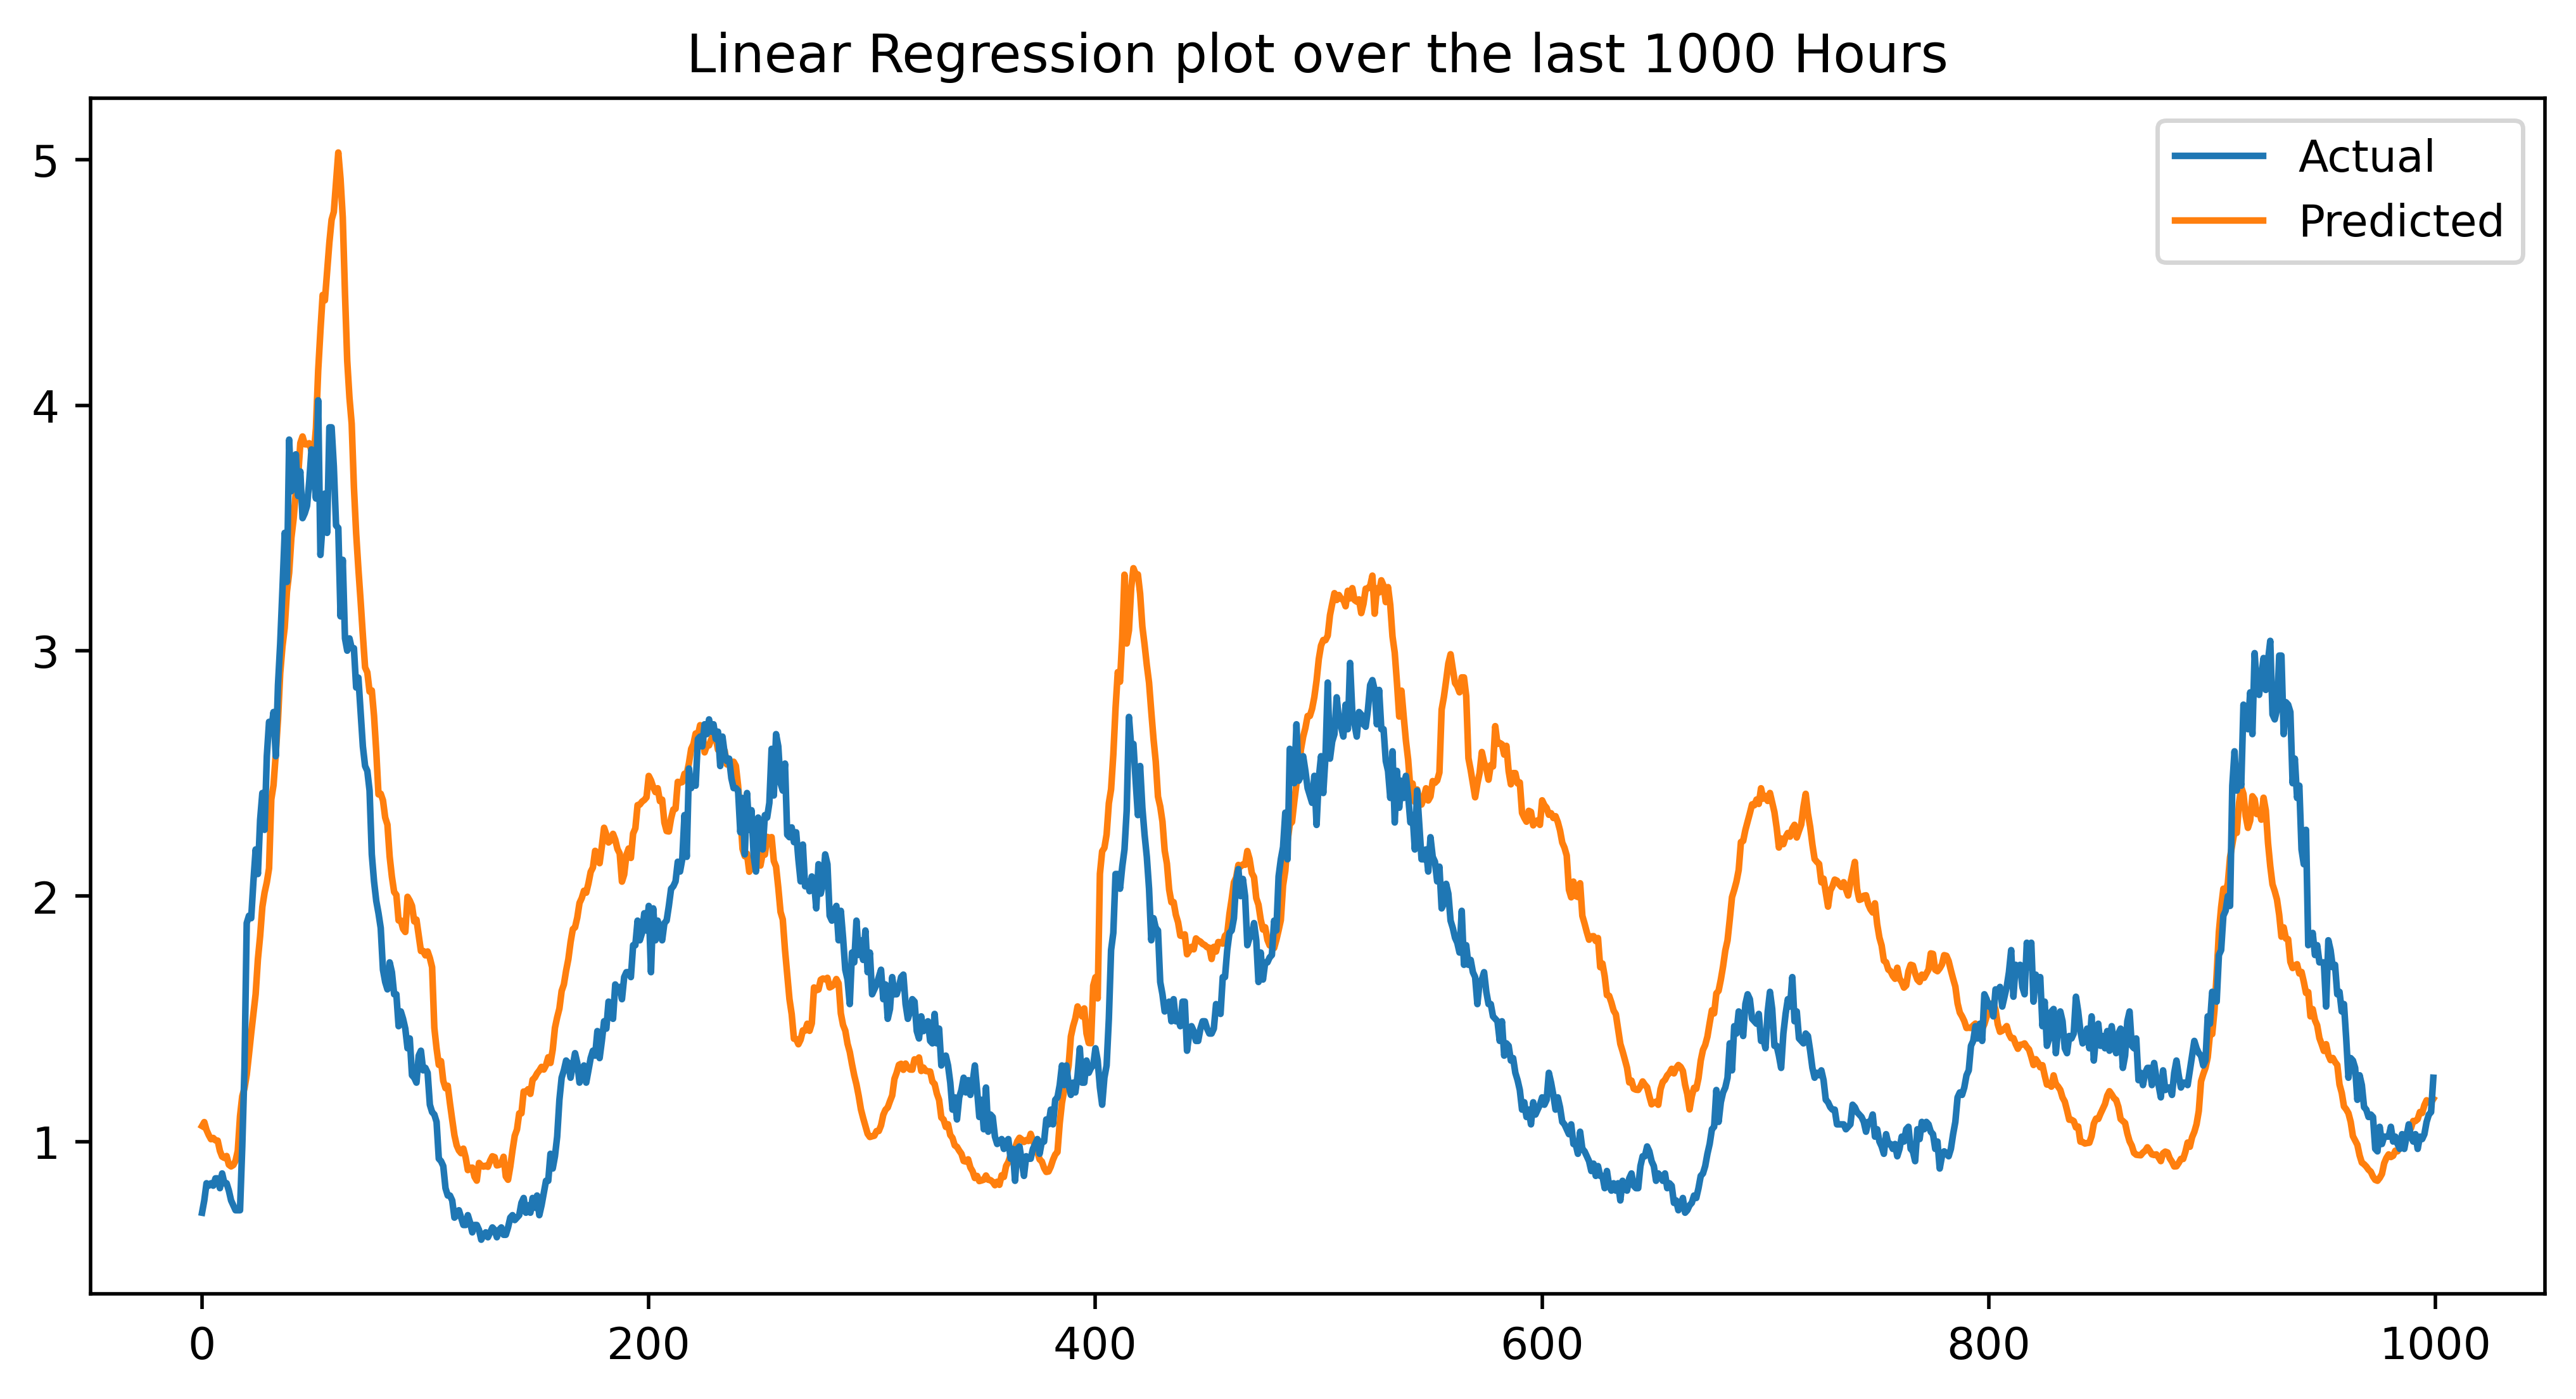

In [980]:

Y_pred = Mo5.predict(X3TST)
fig1=plt.figure(figsize=(10,5),dpi=500)
plt.plot(Y3TST[-1000:], label='Actual', zorder = 10)
plt.plot(Y_pred[-1000:],label='Predicted',zorder=1)
plt.title('Linear Regression plot over the last 1000 Hours')
plt.legend()


In [981]:
XDFTRN = sm.add_constant(XDFTRN)
model = sm.OLS(YDFTRN, XDFTRN).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   WVHT   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     5532.
Date:                Tue, 09 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:49:41   Log-Likelihood:                -12932.
No. Observations:               24115   AIC:                         2.589e+04
Df Residuals:                   24103   BIC:                         2.598e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5911      0.041     38.955      0.0

In [982]:
def testing(X, Y, p):
    n = X.shape[0]
    f = X.shape[1]
    X_in = np.ones([n,1])
    X_out = np.hstack((X_in,X))
    for i in range(2,p):
        P_X = X ** p
        X_out = np.hstack((X_out, P_X))
    X = X_out 
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    XTy = X.T @ Y

testing(X3TRN,Y3TRN, 3)
    